# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.128851e+01     6.658499e+00
 * time: 0.08794999122619629
     1     2.906799e+01     6.287646e+00
 * time: 0.09608578681945801
     2     2.303382e+01     8.805024e+00
 * time: 0.11510491371154785
     3     1.409536e+01     2.384036e+00
 * time: 0.1378459930419922
     4     1.397708e+01     3.610002e+00
 * time: 0.15294480323791504
     5     1.244458e+01     2.078807e+00
 * time: 0.16817498207092285
     6     1.023067e+01     1.606808e+00
 * time: 0.1832900047302246
     7     9.926486e+00     8.391606e-01
 * time: 0.1984238624572754
     8     9.630692e+00     1.048622e+00
 * time: 0.2135758399963379
     9     9.425302e+00     5.443404e-01
 * time: 0.22866582870483398
    10     9.246642e+00     5.651561e-01
 * time: 0.24380278587341309
    11     9.183235e+00     8.115993e-01
 * time: 0.2552030086517334
    12     9.034435e+00     5.247727e-01
 * time: 0.26657581329345703
    13     8.913559e+00     6.240673e-01
 * time: 0.27

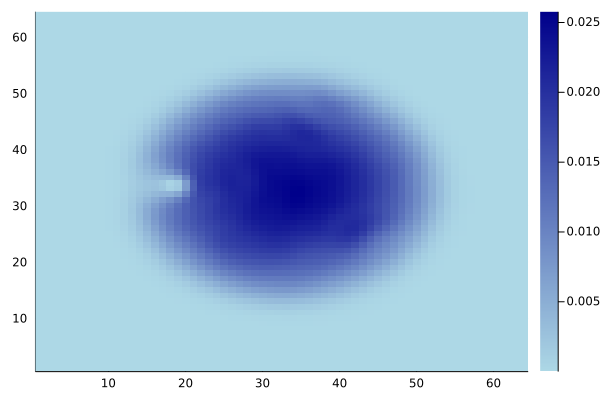

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)